https://towardsdatascience.com/using-the-fitbit-web-api-with-python-f29f119621ea

In [13]:
client_id = '23968Z'
client_secret = '116796f22020af0dc4707327644f410b'
redirect_uri = " http://127.0.0.1:8080/"

# This is a python file you need to have in the same directory as your code so you can import it
import gather_keys_oauth2 as Oauth2
import fitbit
import pandas as pd 
import datetime



CLIENT_ID=client_id
CLIENT_SECRET=client_secret
server=Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,CLIENT_SECRET,oauth2=True,access_token=ACCESS_TOKEN,refresh_token=REFRESH_TOKEN)

[17/Feb/2023:15:40:52] ENGINE Listening for SIGTERM.
[17/Feb/2023:15:40:52] ENGINE Listening for SIGHUP.
[17/Feb/2023:15:40:52] ENGINE Listening for SIGUSR1.
[17/Feb/2023:15:40:52] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[17/Feb/2023:15:40:52] ENGINE Started monitor thread 'Autoreloader'.
[17/Feb/2023:15:40:52] ENGINE Serving on http://127.0.0.1:8080
[17/Feb/2023:15:40:52] ENGINE Bus STARTED


127.0.0.1 - - [17/Feb/2023:15:41:00] "GET /?code=194182b9ef6c2f0d61c71f24bf0caea87e84f9e2&state=UJwiIwKpck7P4kF2g3w4JAOEuFVBRO HTTP/1.1" 200 122 "" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Safari/605.1.15"


[17/Feb/2023:15:41:01] ENGINE Bus STOPPING
[17/Feb/2023:15:41:01] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[17/Feb/2023:15:41:01] ENGINE Stopped thread 'Autoreloader'.
[17/Feb/2023:15:41:01] ENGINE Bus STOPPED
[17/Feb/2023:15:41:01] ENGINE Bus EXITING
[17/Feb/2023:15:41:01] ENGINE Bus EXITED
[17/Feb/2023:15:41:01] ENGINE Waiting for child threads to terminate...


In [14]:
# This is the date of data that I want. 
# You will need to modify for the date you want
oneDate = pd.datetime(year = 2023, month = 2, day = 16)
oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1sec')
oneDayData

/Users/GCShepherd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


{'activities-heart': [{'dateTime': '2023-02-16',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 1663.056,
      'max': 104,
      'min': 30,
      'minutes': 1440,
      'name': 'Out of Range'},
     {'caloriesOut': 0,
      'max': 129,
      'min': 104,
      'minutes': 0,
      'name': 'Fat Burn'},
     {'caloriesOut': 0,
      'max': 159,
      'min': 129,
      'minutes': 0,
      'name': 'Cardio'},
     {'caloriesOut': 0,
      'max': 220,
      'min': 159,
      'minutes': 0,
      'name': 'Peak'}]}}],
 'activities-heart-intraday': {'dataset': [],
  'datasetInterval': 1,
  'datasetType': 'second'}}

In [15]:
# This is the date of data that I want. 
# You will need to modify for the date you want
oneDate = pd.datetime(year = 2023, month = 1, day = 26)
oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1sec')
oneDayData

/Users/GCShepherd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


{'activities-heart': [{'dateTime': '2023-01-26',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 2146.3816500000003,
      'max': 103,
      'min': 30,
      'minutes': 1378,
      'name': 'Out of Range'},
     {'caloriesOut': 314.24828999999994,
      'max': 128,
      'min': 103,
      'minutes': 39,
      'name': 'Fat Burn'},
     {'caloriesOut': 246.91761999999997,
      'max': 159,
      'min': 128,
      'minutes': 23,
      'name': 'Cardio'},
     {'caloriesOut': 0, 'max': 220, 'min': 159, 'minutes': 0, 'name': 'Peak'}],
    'restingHeartRate': 54}}],
 'activities-heart-intraday': {'dataset': [{'time': '00:00:05', 'value': 49},
   {'time': '00:00:20', 'value': 49},
   {'time': '00:00:35', 'value': 50},
   {'time': '00:00:40', 'value': 49},
   {'time': '00:00:55', 'value': 50},
   {'time': '00:01:05', 'value': 49},
   {'time': '00:01:10', 'value': 48},
   {'time': '00:01:20', 'value': 51},
   {'time': '00:01:25', 'value': 52},
   {'time': '00:01:30

In [16]:
startTime = pd.datetime(year = 2022, month = 9, day = 1)
endTime = pd.datetime.today().date()

date_list = []
df_list = []
allDates = pd.date_range(start = startTime, end = endTime)


for oneDate in allDates:
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    ondDayData = oneDayData = auth2_client.intraday_time_series('activities/heart', base_date = oneDate, detail_level='1sec')
    df = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])
    date_list.append(oneDate)
    df_list.append(df)
final_df_list = []
for date,df in zip(date_list, df_list):
    if len(df) == 0:
        continue
    df.loc[:,'date'] = pd.to_datetime(date)
    final_df_list.append(df)
final_df = pd.concat(final_df_list, axis = 0)
final_df

/Users/GCShepherd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/Users/GCShepherd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,time,value,date
0,18:05:59,70,2022-10-17
0,13:25:32,79,2022-10-20
1,13:25:37,80,2022-10-20
2,13:25:42,79,2022-10-20
3,13:25:47,81,2022-10-20
...,...,...,...
964,15:39:40,57,2023-02-17
965,15:39:45,59,2023-02-17
966,15:39:50,61,2023-02-17
967,15:39:55,62,2023-02-17


In [17]:
final_df

,time,value,date
0,18:05:59,70,2022-10-17
0,13:25:32,79,2022-10-20
1,13:25:37,80,2022-10-20
2,13:25:42,79,2022-10-20
3,13:25:47,81,2022-10-20
...,...,...,...
964,15:39:40,57,2023-02-17
965,15:39:45,59,2023-02-17
966,15:39:50,61,2023-02-17
967,15:39:55,62,2023-02-17


In [33]:
final_df.to_csv('ghc_heartrate.csv')

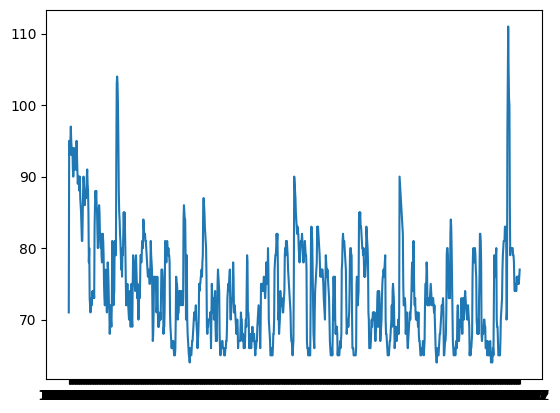

In [100]:
# plt.plot(df2.time, df2.value)
# plt.show()

In [21]:
# I want to get the hour of the day and time. The end goal of this section is to get a particular time on a particular day. 
hoursDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.hour.apply(lambda x: datetime.timedelta(hours = x))
minutesDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.minute.apply(lambda x: datetime.timedelta(minutes = x))
secondsDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.second.apply(lambda x: datetime.timedelta(seconds = x))
# Getting the date to also have the time of the day
final_df['date'] = final_df['date'] + hoursDelta + minutesDelta + secondsDelta
final_df

,time,value,date
0,18:05:59,70,2022-10-17 18:05:59
0,13:25:32,79,2022-10-20 13:25:32
1,13:25:37,80,2022-10-20 13:25:37
2,13:25:42,79,2022-10-20 13:25:42
3,13:25:47,81,2022-10-20 13:25:47
...,...,...,...
964,15:39:40,57,2023-02-17 15:39:40
965,15:39:45,59,2023-02-17 15:39:45
966,15:39:50,61,2023-02-17 15:39:50
967,15:39:55,62,2023-02-17 15:39:55


In [27]:
startDate = pd.datetime(year = 2023, month = 1, day = 26)
lastDate = pd.datetime(year = 2023, month = 1, day = 27)
coupledays_df = final_df.loc[final_df.loc[:, 'date'].between(startDate, lastDate), :]

/Users/GCShepherd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/Users/GCShepherd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


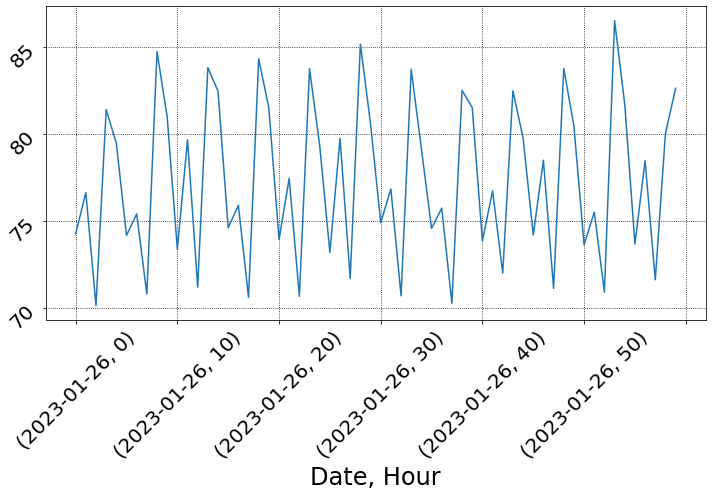

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 7))
# Taken from: https://stackoverflow.com/questions/16266019/python-pandas-group-datetime-column-into-hour-and-minute-aggregations
times = pd.to_datetime(coupledays_df['date'])
coupledays_df.groupby([times.dt.date,times.dt.second]).value.mean().plot(ax = ax)
ax.grid(True,
    axis = 'both',
    zorder = 0,
    linestyle = ':',
    color = 'k')
ax.tick_params(axis = 'both', rotation = 45, labelsize = 20)
ax.set_xlabel('Date, Hour', fontsize = 24)
fig.tight_layout()

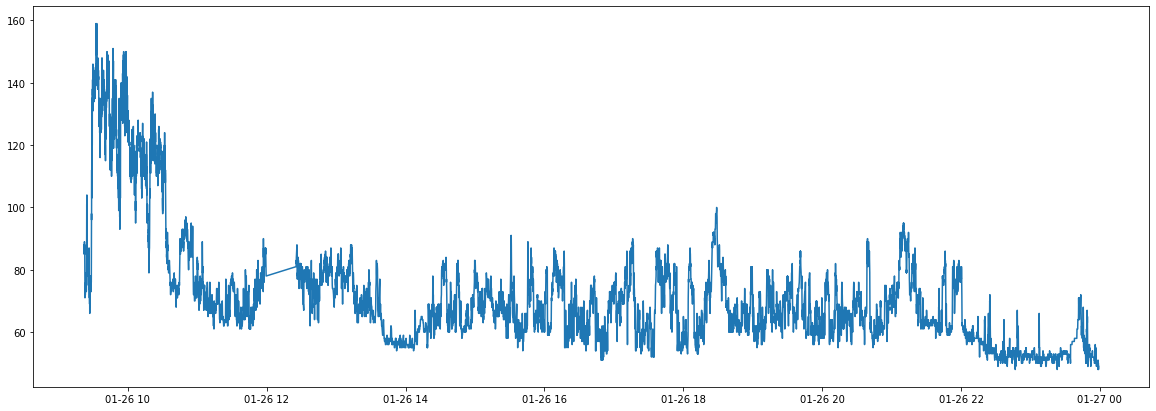

In [32]:
coupledays_df2 = coupledays_df.tail(10000)
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(coupledays_df2.date, coupledays_df2.value)


In [30]:
coupledays_df.groupby([times.dt.date,times.dt.hour]).value.mean()

date        date
2023-01-26  0        50.707572
            1        50.858974
            2        51.748268
            3        48.798942
            4        49.910670
            5        50.952756
            6        52.583732
            7        58.846827
            8        68.263352
            9       119.753274
            10      108.504025
            11       70.472759
            12       76.706422
            13       69.175889
            14       65.650000
            15       67.743119
            16       66.484211
            17       69.367596
            18       69.673993
            19       66.479930
            20       66.124314
            21       72.057196
            22       55.646552
            23       54.450495
Name: value, dtype: float64

In [105]:
# startTime is first date of data that I want. 
# You will need to modify for the date you want your data to start
startTime = pd.datetime(year = 2023, month = 2, day = 1)
endTime = pd.datetime.today().date() - datetime.timedelta(days=1)
date_list = []
resting_list = []
allDates = pd.date_range(start=startTime, end = endTime)
for oneDate in allDates:
    
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    
    oneDayData = auth2_client.intraday_time_series('activities/heart', base_date=oneDate, detail_level='1sec')
    
    date_list.append(oneDate)
    
    resting_list.append(oneDayData['activities-heart'][0]['value']['restingHeartRate'])
# there is more matplotlib code on GitHub
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(date_list, resting_list)

C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\4142396263.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startTime = pd.datetime(year = 2023, month = 2, day = 1)
C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\4142396263.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  endTime = pd.datetime.today().date() - datetime.timedelta(days=1)


HTTPTooManyRequests: Too Many Requests

In [ ]:
oneDayData['activities-heart'][0]['value']

{'customHeartRateZones': [],
 'heartRateZones': [{'caloriesOut': 1680.912,
   'max': 112,
   'min': 30,
   'minutes': 1440,
   'name': 'Out of Range'},
  {'caloriesOut': 0, 'max': 139, 'min': 112, 'minutes': 0, 'name': 'Fat Burn'},
  {'caloriesOut': 0, 'max': 172, 'min': 139, 'minutes': 0, 'name': 'Cardio'},
  {'caloriesOut': 0, 'max': 220, 'min': 172, 'minutes': 0, 'name': 'Peak'}]}